# <font color = Crimson size = 6> <b>Регрессионный анализ в науке о данных<br> </b> </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.gam.api import GLMGam, BSplines

import warnings
warnings.filterwarnings('ignore')

***
## <font color = DarkGreen size = 5> <b>Предсказание с использованием регрессии</b> </font>

Первоочередное предназначение регрессии в науке о данных заключается в предсказании. Это полезно учитывать потому, что регрессия, будучи проверенным временем и признанным статистическим методом, сопровождается багажом, который более соответствует своей традиционной роли объяснительного моделирования, чем предсказанию.

***
### <font color = MediumBlue size = 4> <b>Экстраполяция</b> </font>

**Экстраполяция (extrapolation)**
— расширение модели за пределы диапазона данных, использованных для ее подгонки.

Регрессионные модели не следует использовать для экстраполирования за пределы диапазона данных (исключая использование регрессии для прогнозирования временных рядов). Модель допустима только для тех предсказателей, для которых в данных имеется достаточно значений.

***
### <font color = MediumBlue size = 4> <b>Доверительный и предсказательный интервалы</b> </font>

**Предсказательный интервал (prediction interval)** \
— интервал неопределенности вокруг отдельного предсказанного значения.

Большая часть статистик предусматривает понимание и измерение вариабельности (неопределенности). t-Статистики и p-значения, о которых сообщается на выходе из регрессии, решают это формальным образом, что иногда полезно для отбора переменной. Более полезными метриками являются доверительные интервалы, которые суть интервалы неопределенности, помещаемые вокруг регрессионных коэффициентов и предсказаний. Простой путь к пониманию этих метрик лежит через бутстрап. Доверительные интервалы, наиболее часто встречающиеся на выходе из вычислительных систем, относятся к регрессионным параметрам (коэффициентам).

Например, алгоритм бутстрапа, который генерирует доверительные интервалы для параметров (коэффициентов) регрессии с использованием набора данных с $p$ предсказателями и $n$ записями (строками):
1. Рассматривать каждую строку (включая переменную исхода) как отдельный "пакет" и поместить все $n$ пакетов в коробку.
2. Вынуть пакет наугад, записать его значения и вернуть его в коробку.
3. Повторить $n$ раз шаг 2 - теперь у вас есть одна бутстраповская повторно отобранная выборка.
4. Выполнить подгонку регрессии к бутстраповской выборке и записать оценочные коэффициенты.
5. Повторить шаги 2–4, скажем, 1000 раз.
6. Теперь у вас есть 1000 бутстраповских значений для каждого коэффициента; найти соответствующие процентили для каждого из них (например, 5-й и 95-й для 90%-ного доверительного интервала).

Больший интерес для исследователей данных представляют интервалы вокруг предсказанных значений $\hat{y_i}$. Неопределенность
вокруг $\hat{y_i}$ вытекает из двух источников:
* неопределенность в том, каковы релевантные предсказательные переменные и их коэффициенты;
* дополнительная ошибка, присущая отдельным точкам данных.

Вы можете думать об ошибке отдельной точки данных следующим образом: даже если бы мы знали определенно, каким было уравнение регрессии (например, если бы мы имели огромное число записей для подгонки), *фактические* значения исхода для заданного множества значений предсказателей будут варьироваться. Мы можем смоделировать эту отдельную ошибку остатками от подогнанных значений. Алгоритм бутстрапа для моделирования как ошибки регрессионной модели, так и ошибки отдельной точки данных будет выглядеть следующим образом:
1. Взять бутстраповскую выборку из данных.
2. Выполнить подгонку регрессии и предсказать новое значение.
3. Взять наугад один-единственный остаток из первоначальной подгонки регрессии, прибавить его к предсказанному значению и записать результат.
4. Повторить шаги 1–3, скажем, 1000 раз.
5. Найти 2.5-й и 97.5-й процентили результатов.

> Предсказательный интервал касается неопределенности вокруг одного единственного значения, тогда как доверительный интервал связан со средним значением или другой статистикой, рассчитанными из многочисленных значений. Таким образом, для того же значения предсказательный интервал, как правило, будет намного шире доверительного интервала. Мы моделируем ошибку отдельного значения в бутстраповской модели путем отбора отдельного остатка с тем, чтобы его прикрепить к предсказанному значению. Который из двух интервалов использовать? Все зависит от контекста и предназначения анализа, но в общем случае исследователи данных интересуются специфическими отдельными предсказаниями, поэтому предсказательный интервал будет более подходящим. Выбор доверительного интервала тогда, когда необходимо использовать предсказательный интервал, значительно недооценивает неопределенность в конкретном предсказанном значении.


***
## <font color = DarkGreen size = 5> <b>Факторные переменные в регрессии</b> </font>

**Факторные (категориальные) переменные**, принимают предельное число дискретных значений. Двоичная переменная, именуемая также **индикаторной** переменной, является особым случаем факторной переменной. Регрессия требует на входе числовые данные, поэтому факторные переменные нужно перекодировать, чтобы их можно было использовать в модели.

Кодирование категориальных факторов:
1. **Фиктивные переменные (dummy variables)**. Двоичные переменные, принимащие значения 0 и 1 и выводимые путем перекодирования факторных данных, для использования в регрессии и других моделях. <br><br>

2. **Опорное кодирование (Reference coding)**. Наиболее часто встречающийся тип кодирования, используемый в статистике, в котором один уровень фактора выбирается в качестве опорного, а другие факторы сопоставляются с этим уровнем. <br><br>

3. **Кодировщик с одним активным состоянием (one hot encoder)**. Тип кодирования, общепринятый в сообществе машинного обучения, при котором сохраняются все уровни факторов. Не подходит для множественной линейной регрессии. <br><br>

4. **Девиационное кодирование (deviation coding) / суммовые контрасты**. Тип кодирования, при котором каждый уровень сравнивается не с опорным уровнем, а с совокупным средним. <br><br>

5. **Полиномиальное кодирование**. Для упорядоченных факторов.

***
### <font color = MediumBlue size = 4> <b>Фиктивные переменные</b> </font>

Это наиболее часто встречающийся подход, который состоит в конвертировании переменной во множество двоичных фиктивных переменных.

##### <font color = SlateBlue size = 3> Пример </font>

В данных жилого фонда округа Кинг имеется факторная переменная, соответствующая типу собственности; ниже показано малое подмножество из шести записей.

In [2]:
df = pd.read_csv('./data/house_sales.csv', sep='\t')
df.head()

,ID,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [3]:
df['DocumentDate']= pd.to_datetime(df['DocumentDate'], format='%Y-%m-%d')
df['ym']= pd.to_datetime(df['ym'], format='%Y-%m-%d')
df['Weight'] = df['DocumentDate'].dt.year - 2005

Имеются три возможных значения: Multiplex (мультиплекс), Single Family (односемейный) и Townhouse (таунхаус). Для того чтобы воспользоваться указанной факторной переменной, мы должны конвертировать ее во множество двоичных переменных. Это делается путем создания двоичной переменной для каждого возможного значения факторной переменной.

In [4]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'PropertyType']
outcome = 'AdjSalePrice'

В Python мы можем конвертировать категориальные переменные в фиктивные с помощью метода **get_dummies** пакета **pandas**.\
По умолчанию возвращает одну кодировку категориальной переменной с одним активным состоянием.

In [5]:
pd.get_dummies(df['PropertyType']).head(10)

,Multiplex,Single Family,Townhouse
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


Именованный аргумент **drop_first** будет возвращать $p-1$ столбцов. Используйте его во избежание проблемы мультиколлинеарности.

In [6]:
pd.get_dummies(df['PropertyType'], drop_first=True).head(10)

,Single Family,Townhouse
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,0,0


В некоторых автоматически обучающихся алгоритмах, таких как ближайшие соседи и древесные модели, кодирование с одним активным состоянием является стандартным способом представления факторных переменных.

В регрессионной формулировке факторная переменная с $p$ четко различимыми уровнями обычно представляется матрицей только с $p-1$ столбцами. Это обусловлено тем, что регрессионная модель в типичной ситуации включает член пересечения. Говоря о ересечении, после того как вы определили значения для $p-1$ двоичных столбцов, значение $p$-го становится известным и может считаться избыточным. Добавление $p$-го столбца вызовет ошибку мультиколлинеарности.

Метод **get_dummies** принимает необязательный именованный аргумент **drop_first**, чтобы исключить первый фактор в качестве опоры:

In [7]:
X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)
Y = df[outcome]

house_lm = LinearRegression()
house_lm.fit(X, Y)
y = house_lm.predict(X)

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 6266416.926
Coefficients:
 SqFtTotLiving: 200.973
 SqFtLot: 0.076
 Bathrooms: 43019.102
 Bedrooms: -51554.557
 BldgGrade: 136336.550
 YrBuilt: -3609.917
 PropertyType_Single Family: 23950.215
 PropertyType_Townhouse: 88048.216


Результат регрессии показывает два коэффициента, соответствующих типу собственности Property Type: PropertyType_SingleFamily и PropertyType_Townhouse. Коэффициент Multiplex отсутствует, поскольку он неявно определяется, когда PropertyType_SingleFamily = 0 и PropertyType_Townhouse = 0. Эти коэффициенты интерпретируются как относительные для Multiplex, и поэтому стоимость дома
с типом собственности Single Family меньше почти на 85 000, и стоимость дома с типом собственности Townhouse меньше более чем на 150 000.

In [8]:
house_ols = sm.OLS(df[outcome], X.assign(const=1))
results = house_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4156.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:30   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22678   BIC:                         6.276e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

***
### <font color = MediumBlue size = 4> <b>Факторные переменные с многочисленными уровнями</b> </font>

Некоторые факторные переменные могут производить огромное число двоичных фиктивных переменных — почтовые индексы — это образец факторной переменной, а в США имеется 43 тыс. почтовых индексов. В таких случаях полезно разведать данные, а также связи между предсказательными переменными и исходом, чтобы определить наличие полезной информации в категориях. Если она имеется, то далее вы должны принять решение о том, имеет ли смысл оставить все факторы, или о том, следует ли уровни консолидировать. В округе Кинг имеется 82 почтовых индекса с продажей домов.

In [9]:
pd.DataFrame(df['ZipCode'].value_counts())

,ZipCode
98038,788
98103,671
98042,641
98115,620
98117,619
...,...
98288,4
98224,3
98068,1
98113,1


Переменная ZipCode имеет важно значение, поскольку она является эрзацем для эффекта местоположения, влияющего на стоимость дома. Включение в состав всех уровней требует 81 коэффициента, что соответствует 81 степени свободы. Исходная модель house_lm имеет всего 5 степеней свободы. Более того, несколько почтовых индексов имеют всего одну продажу. В некоторых задачах вы можете консолидировать почтовый индекс при помощи первых двух-трех цифр, что соответствует субметропольному географическому району. Для округа Кинг почти все продажи происходят в индексах 980xx или 981xx, так что это не помогает.

Альтернативный подход состоит в группировании почтовых индексов в соответствии с еще одной переменной, такой как продажная цена. Еще лучше формировать группы с почтовыми индексами, используя остатки из первоначальной модели.

In [10]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': df['ZipCode'],
        'residual' : Y - y,
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x['residual'].median()
    })
]).sort_values('median_residual')

zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)

#zip_groups.ZipGroup.value_counts().sort_index()
zip_groups

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-459972.014219,4,0
27,98043,1,-181435.072075,5,0
46,98092,289,-139867.610195,294,0
31,98051,32,-109478.163991,326,0
79,98354,9,-91097.684128,335,0
...,...,...,...,...,...
54,98112,357,119936.173458,22100,4
77,98224,3,133430.440264,22103,4
25,98040,244,210063.130817,22347,4
3,98004,293,356561.107943,22640,4


In [11]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
df = df.join(to_join, on='ZipCode')
df['ZipGroup'] = df['ZipGroup'].astype('category')

***
### <font color = MediumBlue size = 4> <b>Упорядоченные факторные переменные</b> </font>

Некоторые факторные переменные отражают уровни фактора; они называются **упорядоченными факторными переменными** или **упорядоченными категориальными переменными**. 

Нередко упорядоченные факторные переменные могут быть конвертированы в числовые значения и использоваться как есть. Например, переменная BldgGrade — это упорядоченная факторная переменная. Хотя категории качества имеют конкретный смысл, числовое значение упорядочено снизу вверх, соответствуя домам более высокого качества. В регрессионной модели house_lm категория BldgGrade трактовалась как числовая переменная.

Рассмотрение упорядоченных факторов в качестве числовой переменной сохраняет информацию, содержащуюся в упорядочении, которая будет потеряна, если его конвертировать в фактор.

***
## <font color = DarkGreen size = 5> <b>Интерпретирование уравнения регрессии</b> </font>

В науке о данных самое важное применение регрессии состоит в предсказании зависимой переменной (исхода). В некоторых случаях, однако, получение более глубокого представления непосредственно из самого уравнения, чтобы понять природу связи между предсказателями и исходом, является ценностью.

***
### <font color = MediumBlue size = 4> <b>Коррелированные предсказатели</b> </font>

**Коррелированные переменные (correlated variables)** — когда предсказательные переменные высоко коррелированы, сложно интерпретировать отдельные коэффициенты.

В множественной регрессии предсказательные переменные часто коррелируют друг с другом.

Например, в нашей модели коэффициент для спален Bedrooms является отрицательным! Из этого вытекает, что добавление спальни в дом уменьшит его стоимость. Как это может быть? Это вызвано тем, что предсказательные переменные коррелированы: в более крупных домах наблюдается тенденция к большему количеству спален, и именно размер дома управляет его стоимостью, а не число спален. Рассмотрим два дома одного и того же размера: разумно ожидать, что дом с бóльшим числом спален, но меньших по площади будет считаться менее желательным.

Наличие коррелированных предсказателей усложняет интерпретирование знака и значения регрессионных коэффициентов (и может раздуть стандартную ошибку оценочных значений). Переменные для спален, размера дома и числа ванных комнат — все они являются коррелированными.

Выполним подгонку еще одной регрессии после удаления переменных SqFtTotLiving (жилая площадь) и Bathrooms (ванные комнаты) из уравнения.

In [12]:
predictors = ['Bedrooms', 'BldgGrade', 'YrBuilt', 'PropertyType']

X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)
Y = df[outcome]

house_lm = LinearRegression()
house_lm.fit(X, Y)
y = house_lm.predict(X)

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.537
 BldgGrade: 248997.794
 YrBuilt: -3211.745
 PropertyType_Single Family: -19898.495
 PropertyType_Townhouse: -47355.437


In [13]:
house_ols = sm.OLS(df[outcome], X.assign(const=1))
results = house_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4836.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:30   Log-Likelihood:            -3.1576e+05
No. Observations:               22687   AIC:                         6.315e+05
Df Residuals:                   22681   BIC:                         6.316e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Bedrooms            

Теперь коэффициент для спален является положительным — в соответствии с тем, что мы ожидали бы (хотя теперь, когда эти переменные были исключены, он на самом деле действует как эрзац для размера дома).

***
### <font color = MediumBlue size = 4> <b>Мультиколлинеарность</b> </font>

**Мультиколлинеарность (multicollinearity) / коллинеарность / солинейность** — когда предсказательные переменные имеют идеальную или почти идеальную корреляцию, регрессия может быть нестабильной либо ее невозможно вычислить.

Предельный случай коррелированных переменных производит **мультиколлинеарность** — условие, в котором существует избыток среди предсказательных переменных. Идеальная мультиколлинеарность случается, когда одна предсказательная переменная может быть выражена как линейная комбинация других. Мультиколлинеарность происходит, когда:
* переменная включается в состав модели многократно по ошибке;
* из факторной переменной создаются $p$ фиктивных переменных вместо $p-1$;
* две переменные почти идеально коррелированы друг с другом.

Вопрос мультиколлинеарности в регрессии должен быть решен — переменные необходимо исключать до тех пор, пока мультиколлинеарность не исчезнет. Регрессия не имеет хорошо определенного решения в присутствии идеальной мультиколлинеарности. В случае неидеальной мультиколлинеарности вычислительная система может получить решение, но результаты могут быть нестабильными.

***
### <font color = MediumBlue size = 4> <b>Искажающие переменные</b> </font>

**Искажающие переменные (confounding variables) / спутывающие переменные** — важный предсказатель, который, если его опустить, приводит к мнимым связям в уравнении регрессии.

С коррелированными переменными проблема состоит во включении переменных в состав: включение разных переменных, которые имеют похожую предсказательную связь с откликом. С искажающими переменными проблемой является исключение переменных из состава: важная переменная не включена в уравнение регрессии. Наивная интерпретация коэффициентов уравнения может привести к несостоятельным заключениям.

Возьмем, например, уравнение регрессии для округа Кинг:

In [14]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'PropertyType']
X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)

house_ols = sm.OLS(df[outcome], X.assign(const=1))
results = house_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4156.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:30   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22678   BIC:                         6.276e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

Регрессионные коэффициенты SqFtLot (площадь земельного участка) и Bedrooms (спальни) — являются отрицательными. Исходная регрессионная модель не содержит переменную, которая представляла бы местоположение — очень важный предсказатель цены на недвижимость. Для того чтобы смоделировать местоположение, включите переменную ZipGroup (группа почтовых индексов), которая отнесет почтовый индекс в одну из пяти групп от наименее дорогого (0) до самого дорогого (4).

In [15]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'YrBuilt', 'PropertyType', 'ZipGroup']

X = pd.get_dummies(df[predictors], drop_first=True, dtype=int)
Y = df[outcome]

house_lm = LinearRegression()
house_lm.fit(X, Y)
y = house_lm.predict(X)

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm.coef_):
    print(f' {name}: {coef:.3f}')

Intercept: 4079099.044
Coefficients:
 SqFtTotLiving: 195.487
 SqFtLot: 0.257
 Bathrooms: 29490.803
 Bedrooms: -40899.857
 BldgGrade: 115207.338
 YrBuilt: -2472.865
 PropertyType_Single Family: 36001.579
 PropertyType_Townhouse: 32373.862
 ZipGroup_1: 29756.679
 ZipGroup_2: 88119.615
 ZipGroup_3: 127556.840
 ZipGroup_4: 295603.594


In [16]:
house_ols = sm.OLS(df[outcome], X.assign(const=1))
results = house_ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3452.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:30   Log-Likelihood:            -3.1220e+05
No. Observations:               22687   AIC:                         6.244e+05
Df Residuals:                   22674   BIC:                         6.245e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

Переменная ZipGroup, несомненно, является очень важной: дом в самой дорогой группе почтовых индексов оценивается как имеющий более высокую продажную цену почти на 296 000. Коэффициент SqFtLot теперь является положительными, и добавление ванной увеличивает продажную цену на 30 000.

Коэффициент для Bedrooms по-прежнему является отрицательным. Хотя этот феномен противоречит логике, он хорошо известен в торговле недвижимостью. Наличие у домов одинаковой общей жилой площади и большего количества и, следовательно, меньших по размеру спален ассоциируется с менее ценными домами.

***
### <font color = MediumBlue size = 4> <b>Взаимодействия и главные эффекты</b> </font>

**Главные эффекты (main effects)** — связь между предсказательной переменной и переменной исхода, которая не зависит от других переменных.

**Взаимодействия (interactions)** — взаимозависимая связь между двумя или несколькими предсказателями и исходом (откликом).

Специалисты-статистики предпочитают проводить различие между **главными эффектами** (независимыми переменными), и **взаимодействиями** между главными эффектами. Главные эффекты — это то, что подразумевается под предсказательными переменными в уравнении регрессии. Неявное допущение, когда в модели используются только главные эффекты, состоит в том, что связь между предсказательной переменной и откликом не зависит от других предсказательных переменных. Зачастую это не так.

Например, модель, подогнанная к данным жилого фонда округа Кинг включает несколько переменных в качестве главных эффектов, в том числе ZipCode. Местоположение в торговле недвижимостью — краеугольный камень, и естественно допустить, что связь между, скажем, размером дома и продажной ценой зависит от местоположения. Большой дом, построенный в районе с низкой арендной платой, не будет сохранять одинаковую стоимость, что и большой дом, построенный в дорогом районе.

В Python мы должны использовать пакет **statsmodels** для тренировки линейных регрессионных моделей взаимодействиями.

In [17]:
model = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType',
                data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3091.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:32:30   Log-Likelihood:            -3.1136e+05
No. Observations:               22687   AIC:                         6.228e+05
Df Residuals:                   22671   BIC:                         6.229e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Пакет statsmodels берет на себя категориальные переменные (например, ZipGroup[T.1], PropertyType[T.Single Family]) и термины взаимодействия (например, SqFtTotLiving:ZipGroup[T.1]). 

Местоположение и размер дома, похоже, имеют сильное взаимодействие. Для дома в самой низкой группе ZipGroup наклон прямой такой же, что и наклон для главного эффекта SqFtTotLiving, который составляет 137 за кв. фут (это обусловлено использованием опорного кодирования для факторных переменных). Для дома в самой высокой группе ZipGroup наклон прямой равен сумме главного эффекта плюс
SqFtTotLiving:ZipGroup[T.4], или 137 + 219 = 356 за кв. фут. Другими словами, прибавление квадратного фута в группе наиболее дорогих почтовых индексов повышает предсказанную продажную цену почти в 2.6 раза по сравнению с повышением в группе наименее дорогих почтовых индексов.

#### <font color = SteelBlue size = 3> <b>Отбор модели с помощью членов взаимодействия</b></font>

В задачах с участием многочисленных переменных бывает трудно принять решение о том, какие члены уравнения, характеризующие взаимодействия между переменными, должны быть включены в модель. Чаще всего принимается несколько разных подходов.
* В некоторых задачах априорные знания и интуиция могут направлять выбор того, какие члены взаимодействия следует включать в модель.
* Пошаговый отбор может использоваться для отсеивания различных моделей.
* Штрафная регрессия способна автоматически выполнять подгонку к крупному набору возможных членов взаимодействия.
* По-видимому, наиболее часто встречающимся подходом является использование древесных моделей, а также их потомков, случайного леса и градиентно-бустированных деревьев. Указанный класс моделей автоматически выполняет поиск оптимальных членов взаимодействия.


***
## <font color = DarkGreen size = 5> <b>Диагностика регрессии</b> </font>

В объяснительном моделировании (т.е. в контексте исследования) разнообразные шаги в дополнение к метрикам предпринимаются для того, чтобы определить, насколько хорошо модель подогнана к данным; большинство основывается на анализе остатков. Эти шаги непосредственно не решают вопрос предсказательной точности, но они способны обеспечить полезное углубленное понимание предсказательной обстановки.

***
### <font color = MediumBlue size = 4> <b>Выбросы</b> </font>

**Выбросы (outliers)** \
Записи (или значения исхода), которые находятся вдали от остальной части данных (или предсказанного исхода).

Предельное значение (выброс) — такое значение, которое находится вдали от большинства других наблюдений. Как и в случае с оценками центрального положения и вариабельности, где выбросы необходимо улаживать во избежание проблем, выбросы могут вызывать проблемы с регрессионными моделями. В регрессии выброс — это запись, чье фактическое значение y находится вдали от предсказанного значения. Выбросы можно обнаружить путем обследования стандартизированного остатка, т.е. остатка, деленного на стандартную ошибку остатков.

**Стандартизированные остатки (standardized residuals)** \
Остатки, деленные на стандартную ошибку остатков.

Не существует статистической теории, которая отделяет выбросы от невыбросов. Вместо этого существуют (произвольные) эмпирические правила в отношении того, насколько далеко от основной части данных должно находиться наблюдение, чтобы его можно было назвать выбросом. Например, в коробчатой диаграмме выбросами являются те точки данных, которые находятся слишком высоко или слишком низко от границ коробки, где "слишком" означает величину, превышающую "число 1,5, умноженное на межквартильный размах". В регрессии метрика стандартизированного остатка типично используется для определения того, не относится ли запись к классу выбросов. Стандартизированные остатки можно интерпретировать как "число стандартных ошибок от регрессионной прямой".

Выполним подгонку регрессии к данным продаж домов в округе Кинг для всех продаж в почтовом индексе 98105:

In [18]:
df_98105 = df[df['ZipCode'] == 98105]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(df_98105[outcome], df_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.69e-103
Time:                        18:32:30   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

В Python используйте класс OLSInfluence из пакета statsmodels, чтобы проанализировать остатки:

In [19]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

20428 -4.3267318040785705


In [20]:
print(result_98105.resid.loc[sresiduals.idxmin()])

-757753.6192115841


Самая большая завышенная оценка из модели составляет более четырех стандартных ошибок над регрессионной прямой, что соответствует завышенной оценке в 757 753 дол.

Исходная запись данных, которая соответствует этому выбросу:

In [21]:
outlier = df_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 20428, dtype: object


В данном случае, по всей видимости, что-то не так с записью: дом такого размера в типичной ситуации продается за намного бОльшую цену, чем 119 748 в этом почтовом индексе. Возможно продажа предусматривала всего лишь долю в собственности. В этом случае выброс соответствует продаже, которая является аномальной и не должна быть включена в регрессию. Кроме того, выбросы могут быть результатом других проблем, таких как ошибочный ввод данных из-за "толстого пальца" или несовпадения единиц измерения (например, сообщение о продаже в тысячах долларов вместо просто долларов).

Для задач с привлечением больших данных выбросы обычно не представляют проблему в подгонке регрессии, используемой в предсказании новых данных. Однако выбросы занимают центральное место в обнаружении аномалий, где отыскание выбросов является смыслом всего дела. Кроме того, выброс может соответствовать случаю мошенничества или нечаянного действия. В любом случае обнаружение выбросов бывает критической потребностью бизнеса.

> Хотя выбросы могут вызывать проблемы для малых наборов данных, первоочередной интерес к выбросам заключается в выявлении проблем с данными или в локализации аномалий.

***
### <font color = MediumBlue size = 4> <b>Влиятельные значения</b> </font>

**Влиятельное значение (influential value)** \
Значение (или запись), присутствие или отсутствие которого играет важную роль в уравнении регрессии.

Значение, отсутствие которого значимо изменит уравнение регрессии, называется **влиятельным наблюдением**. В регрессии такое значение не обязательно должно ассоциироваться с крупным остатком.

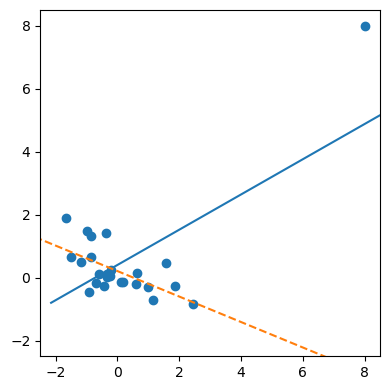

In [22]:
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

Пунктирная прямая соответствует регрессии со всеми данными, тогда как сплошная прямая — регрессии с точкой далеко в правом верхнем углу. Безусловно, это значение данных имеет огромное влияние на регрессию, хотя она не связана с крупным выбросом (из полной регрессии). Считается, что это значение данных имеет в регрессии сильное плечо (или рычаг).

**Плечо (leverage) / рычаг / hat-значение** \
Степень влиятельности, которую отдельная запись имеет на уравнение регрессии.

В дополнение к стандартизированным остаткам специалисты-статистики разработали несколько метрик для определения влиятельности отдельной записи на регрессию. Часто встречающейся мерой плеча является hat-значение; значения выше $\cfrac{2(p+1)}{n}$ говорят о данных с высоким плечом.

Еще одна метрика — **расстояние Кука**, которое определяет влияние как комбинацию плеча и размера остатка. Эмпирическое правило состоит в том, что наблюдение имеет высокое влияние, если расстояние Кука превышает $\cfrac{4}{n-p-1}$.

**График влиятельности**, или **пузырьковый график**, объединяет стандартизированные остатки, hat-значение и расстояние Кука в одном графике.

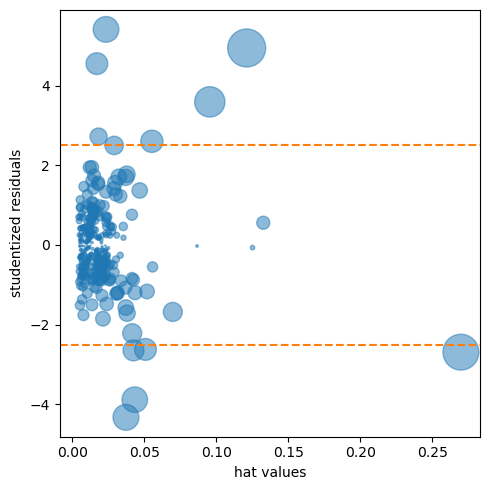

In [23]:
influence = OLSInfluence(result_98105)

fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag,
           influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout();

Судя по всему, имеется несколько точек данных, которые оказывают крупное влияние в регрессии.

Расстояние Кука может быть вычислено при помощи функции cooks.distance, и вы можете использовать hatvalues для вычисления диагностики. hat-значения откладываются на оси x, остатки — на оси y, и размер точек связан со значением расстояния Кука.

Сравним регрессии с полным набором данных и с дальними очень влиятельными точками данных (расстояние Кука больше $0.08$).

In [24]:
mask = [dist < .08 for dist in influence.cooks_distance[0]]
df_infl = df_98105.loc[mask]

ols_infl = sm.OLS(df_infl[outcome], df_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737
const,-772549.862447,-647137.096716


Коэффициент для Bathrooms становится отрицательным, что противоречит логике. Местоположение не было принято во внимание, и почтовый индекс 98105 содержит районы несопоставимых типов домов.

Для целей подгонки регрессии, которая надежно предсказывает будущие данные, выявление влиятельных наблюдений полезно только в меньших по размеру наборах данных. Для регрессий с привлечением большого числа записей существует малая вероятность того, что какое-либо наблюдение будет нести достаточный вес, чтобы вызывать предельное влияние на подогнанное уравнение (хотя регрессия может все же иметь большие выбросы). Для целей обнаружения аномалий тем не менее выявление влиятельных наблюдений бывает очень полезным.

> Отдельные записи (включая регрессионные выбросы) могут оказывать большое влияние на уравнение регрессии с малыми данными, но этот эффект размывается в больших данных.

***
### <font color = MediumBlue size = 4> <b>Гетероскедастичность, ненормальность и коррелированные ошибки</b> </font>

**Ненормальные остатки (non-normal residuals)** \
Ненормально распределенные остатки могут аннулировать некоторые технические условия регрессии; вместе с тем они обычно не являются предметом озабоченности в науке о данных.

В статистике значительное внимание уделяется распределению остатков. Оказывается, что обычные наименьшие квадраты являются несмещенными, и в некоторых случаях "оптимальным" оценщиком, в условиях широкого диапазона допущений о природе распределения. Это означает, что в большинстве задач исследователям данных не приходится слишком беспокоиться о распределении остатков. 

Распределение остатков является релевантным главным образом для подтверждения достоверности формального статистического вывода (проверок гипотез и p-value), что имеет минимальное значение для исследователей данных, озабоченных главным образом предсказательной точностью. Нормально распределенные ошибки — это признак того, что модель завершена; ошибки, которые не являются нормально распределенными, указывают на то, что модель, возможно, что-то упускает. Для того чтобы формальный статистический вывод был достоверным, принимается допущение о том, что остатки нормально распределены, имеют одинаковую дисперсию и являются независимыми. Одной из областей, где это может представлять интерес для исследователей данных, является стандартный расчет доверительных интервалов для предсказанных значений, которые основаны на допущениях об остатках.

**Гетероскедастичность (heteroskedasticity)** \
Ситуация, когда некоторые диапазоны исхода показывают остатки с более высокой дисперсией (что может говорить о предсказателе, который в уравнении отсутствует).

**Гетероскедастичность** — это отсутствие постоянной остаточной дисперсии по всему диапазону предсказанных значений. Другими словами, для некоторых частей диапазона ошибки больше, чем для других. Визуализация данных является удобным способом анализа остатков.

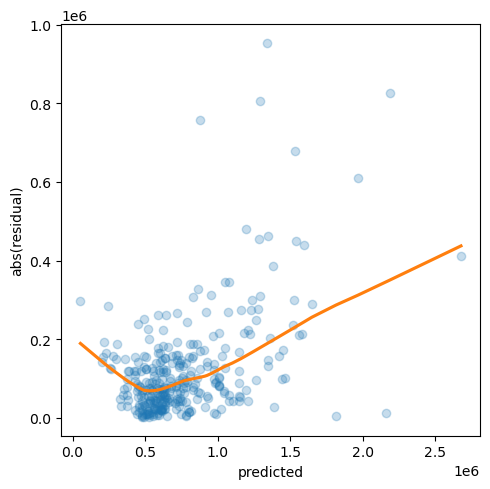

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.regplot(x=result_98105.fittedvalues,
            y=np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)

ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout();

Совершенно очевидно, что дисперсия остатков имеет тренд на увеличение для домов с более высокой стоимостью, но является также крупной для домов с более низкой стоимостью. Приведенный выше график говорит о том, что регрессия lm_98105 имеет гетероскедастичные ошибки.

Гетероскедастичность говорит о том, что ошибки предсказания отличаются для разных диапазонов предсказанного значения и могут свидетельствовать о незаконченной модели. Например, гетероскедастичность в lm_98105 может говорить о том, что регрессия что-то не учла в высокодиапазонных и низкодиапазонных домах.

Построим гистограмму стандартизированных остатков для регрессии lm_98105.

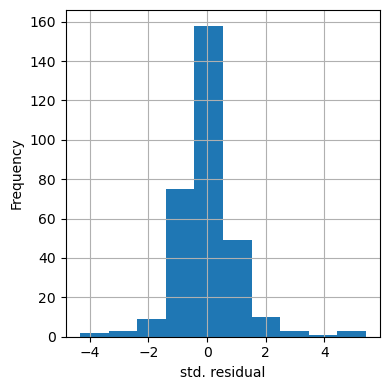

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))

pd.Series(influence.resid_studentized_internal).hist(ax=ax)

ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')


plt.tight_layout();

Ее распределение однозначно имеет более длинные хвосты, чем у нормального распределения, и демонстрирует умеренную асимметричность в сторону более крупных остатков.

Специалисты-статистики могут также проверить допущение о том, что ошибки являются независимыми. Это особенно верно в отношении данных, которые собираются в течение долгого времени. Статистика Дарбина—Уотсона (Durbin—Watson) может использоваться для обнаружения того, существует ли значительная автокорреляция в регрессии с участием данных временного ряда. Если ошибки регрессионной модели коррелируют, то эта информация может быть полезна при составлении краткосрочных прогнозов и должна быть встроена в модель. Если целью являются долгосрочные прогнозы или объяснительные модели, то избыточные автокоррелированные данные на микроуровне могут отвлекать внимание. В этом случае сглаживание, или в первую очередь менее гранулярный сбор данных, может быть в порядке вещей.

В большинстве случаев в науке о данных первоочередным объектом интереса является предсказательная точность, и поэтому какой-то анализ гетероскедастичности не помешает. Вы можете обнаружить, что в данных имеется некий сигнал, который ваша модель не уловила. Однако удовлетворение допущений о природе распределения просто ради подтверждения достоверности формального статистического вывода (p-value, F-статистики и т. д.) не представляет для исследователя данных какую-то особую важность.

> Если регрессионная модель используется для формального статистического вывода (p-value и т.п.), то должны быть проверены некоторые допущения о природе распределении остатков. В общем случае, однако, распределение остатков не имеет критическую важность в науке о данных.

***
### <font color = MediumBlue size = 4> <b>Графики частных остатков и нелинейность</b> </font>

**Графики частных остатков (partial residual plots)** \
Диагностический график для выявления связи между переменной исхода и одиночным предсказателем.

**Графики частных остатков** — это способ визуализации того, насколько хорошо вычисленная подгонка объясняет связь между предсказателем и исходом. Главная идея графика частных остатков состоит в изолировании связи между предсказательной переменной и откликом, принимая в расчет все другие предсказательные переменные. Частный остаток можно рассматривать, как "синтетическое результирующее" значение, объединяющее предсказание на основе отдельного предсказателя с фактическим остатком от полного уравнения регрессии. Частный остаток для предсказателя $X_i$ — это обычный остаток плюс член регрессии, связанный с $X_i$.

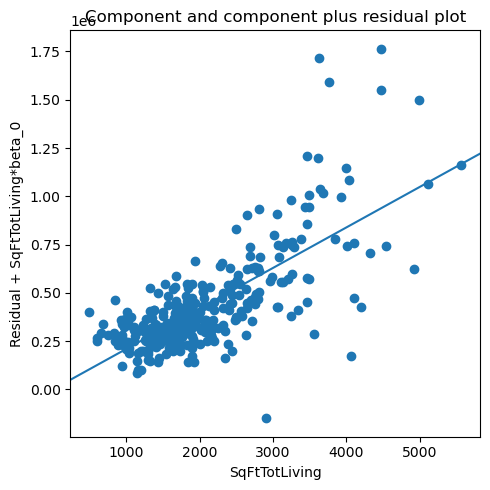

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout();

Частный остаток — это оценка вклада, который SqFtTotLiving вносит в продажную цену. Легко видно, что связь между SqFtTotLiving и продажной ценой нелинейна. Регрессионная прямая недооценивает продажную цену для домов площадью менее 1000 кв. футов и переоценивает цену для домов с площадью между 2000 и 3000 кв. футов. Выше 4000 кв. футов имеется слишком мало точек данных, чтобы сделать выводы для этих домов.

Эта нелинейность имеет смысл в данном случае: добавление 500 футов в малый дом оказывает гораздо большее влияние, чем добавление 500 футов в крупный дом. Это свидетельствует о том, что вместо простого линейного члена для SqFtTotLiving следует рассмотреть нелинейный член.

> График частных остатков может использоваться для качественной диагностики подгонки для каждого члена регрессии, возможно приводя к спецификации альтернативной модели.

***
## <font color = DarkGreen size = 5> <b>Многочленная и сплайновая регрессия</b> </font>

Связь между откликом и предсказательной переменной не обязательно является линейной. Отклик на дозу препарата часто не является линейным: удвоение дозы обычно не приводит к удвоенному отклику. Спрос на продукт не является линейной функцией числа долларов, потраченных на маркетинг, поскольку в какой-то момент спрос, вероятно, будет насыщен. Существует несколько способов, которыми регрессия может быть расширена для получения этих нелинейных эффектов.

***
### <font color = MediumBlue size = 4> <b>Полиномиальная регрессия</b> </font>

**Полиномиальная регрессия (polynomial regression) / многочленная регрессия / параболическая регрессия**
Добавляет в регрессию полиномиальные члены (квадраты, кубы и т. д.).

Многочленная регрессия предусматривает включение в состав уравнения регрессии полиномиальных членов. Например, квадратичная регрессия между откликом $Y$ и предсказателем $X$ примет следующую форму:
$$Y = b_0 + b_1 X + b_2 X^2 + e$$

В пакете **statsmodels** мы добавляем квадратный термин в определение модели с помощью (SqFtTotLiving**2):

In [28]:
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + np.power(SqFtTotLiving, 2) + SqFtLot + Bathrooms + Bedrooms + BldgGrade',
                     data=df_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          9.95e-106
Time:                        18:32:31   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Теперь с переменной SqFtTotLiving связаны два коэффициента: один для линейного члена, другой для квадратичного члена.

График частных остатков говорит о некоторой кривизне в уравнении регрессии, связанном с переменной SqFtTotLiving. Подогнанная линия более точно соответствует сглаженной кривой.

In [29]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

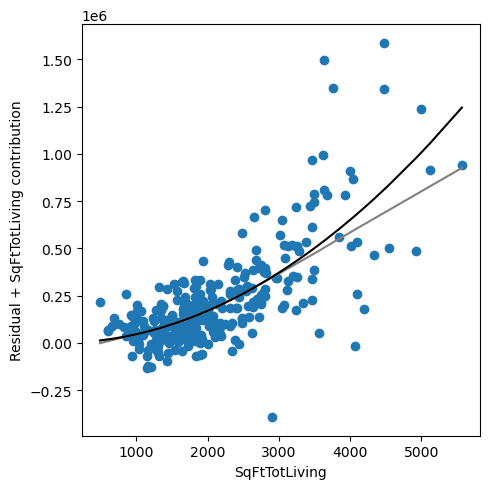

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, df_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)
plt.tight_layout();

In [31]:
print(result_poly.params[2])

0.03879128168237263


***
### <font color = MediumBlue size = 4> <b>Сплайновая регрессия</b> </font>

**Сплайновая регрессия (spline regression)**
Подгонка гладкой кривой серией полиномиальных сегментов.

**Узлы (knots)**
Значения, которые отделяют сплайновые сегменты.

Многочленная регрессия захватывает только некоторый объем кривизны в нелинейной связи. Добавление членов более высоких степеней, таких как кубический квадратный полином, часто приводит к нежелательной "волнистости" в уравнении регрессии. Альтернативный, и часто превосходящий, подход к моделированию нелинейных связей состоит в использовании сплайнов. Сплайны предоставляют способ гладко интерполировать между фиксированными точками.

В техническом определении сплайн — это серия кусочно-непрерывных многочленов. Полиномиальные части гладко соединялись в серии фиксированных точек в предсказательной переменной, которые назывались узлами. Формулировка сплайнов намного сложнее, чем многочленная регрессия; подробности подгонки сплайнов обычно берут на себя статистические вычислительные системы.

Формульный интерфейс пакета statsmodels поддерживает использование сплайнов. Необходимо определить два параметра: степень многочлена и местоположение узлов. В данном случае предсказатель SqFtTotLiving включается в модель с использованием кубического сплайна (degree=3). Указываем B-сплайн, используя df, степени свободы. Это создаст df – степень = 6 – 3 = 3 внутренних узлов с позициями, на границах; в дополнение к этому, узлы также были помещены в нижний квартиль, медианный квартиль и верхний квартиль.



In [32]:
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=df_98105)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          7.10e-104
Time:                        18:32:31   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


В отличие от линейного члена, для которого коэффициент имеет прямой смысл, коэффициенты для сплайнового члена не интерпретируемы. Вместо этого полезнее использовать визуальное изображение для выявления природы сплайновой подгонки (график частных остатков из регрессии).

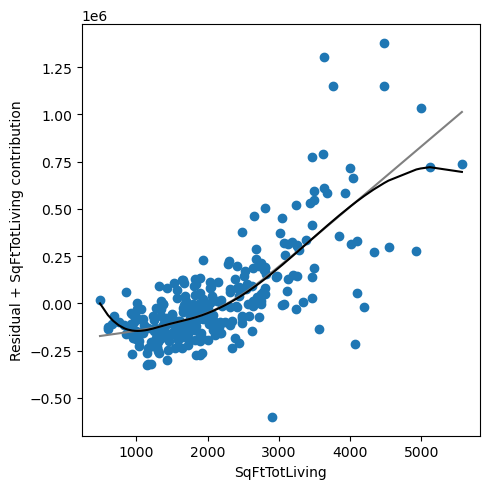

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, df_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)
plt.tight_layout();

В отличие от многочленной модели, сплайновая модель намного ближе подходит к сглаженной кривой, демонстрируя более высокую гибкость сплайнов. В данном случае линия подогнана к данным намного точнее. Означает ли это, что сплайновая регрессия является более оптимальной моделью? Не обязательно. С экономической точки зрения нет никакого смысла в том, чтобы очень небольшие дома (менее 1000 кв. футов) имели более высокую стоимость, чем дома немного более крупного размера. Это, возможно, артефакт искажающей переменной.

***
### <font color = MediumBlue size = 4> <b>Обобщенные аддитивные модели</b> </font>

**Обобщенные аддитивные модели (generalized additive models)** \
Сплайновые модели с автоматизированным отбором узлов.

Предположим, что вы заподозрили нелинейную связь между откликом и предсказательной переменной в силу априорного знания либо вследствие обследования диагностических показателей регрессии. Полиномиальные члены могут быть недостаточно гибкими для улавливания связи, а сплайновые члены требуют указывать узлы. **Обобщенные аддитивные модели (generalized additive models, GAM)** — это гибкий прием моделирования, предназначенный для автоматической подгонки сплайновой регрессии.

In [34]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

x_spline = df_98105[predictors]
bs = BSplines(x_spline, df=[10] + [3] * 4, degree=[3] + [2] * 4)
# penalization weight
alpha = np.array([0] * 5)

formula = ('AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade')

gam_sm = GLMGam.from_formula(formula, data=df_98105, smoother=bs, alpha=alpha)
res_sm = gam_sm.fit()
print(res_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                         GLMGam   Df Residuals:                   295.00
Model Family:                Gaussian   Df Model:                        17.00
Link Function:               identity   Scale:                      2.7471e+10
Method:                         PIRLS   Log-Likelihood:                -4196.6
Date:                Sat, 21 Oct 2023   Deviance:                   8.1039e+12
Time:                        18:32:31   Pearson chi2:                 8.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.481e+05   1.18e+05  

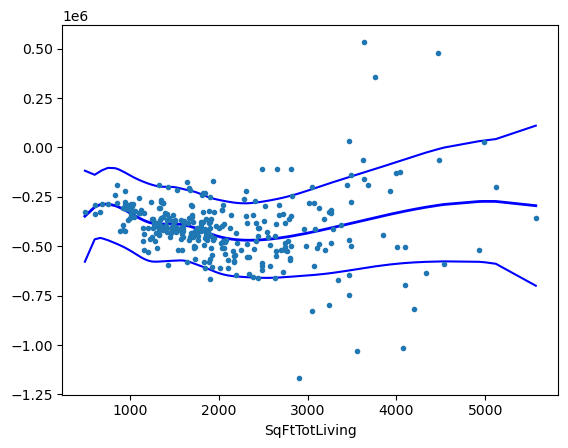

In [35]:
res_sm.plot_partial(0, cpr=True);